<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Generate-an-AR-model-of-the-first-order-with-$\phi-=-0.7$" data-toc-modified-id="Generate-an-AR-model-of-the-first-order-with-$\phi-=-0.7$-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Generate an AR model of the first order with $\phi = 0.7$</a></span></li><li><span><a href="#Look-at-the-ACF-and-PACF-of-your-model-and-write-down-your-conclusions" data-toc-modified-id="Look-at-the-ACF-and-PACF-of-your-model-and-write-down-your-conclusions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Look at the ACF and PACF of your model and write down your conclusions</a></span></li><li><span><a href="#Check-your-model-with-ARMA-in-statsmodels" data-toc-modified-id="Check-your-model-with-ARMA-in-statsmodels-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Check your model with ARMA in statsmodels</a></span></li><li><span><a href="#Generate-an-MA-model-of-the-first-order-with-$\theta-=-0.9$" data-toc-modified-id="Generate-an-MA-model-of-the-first-order-with-$\theta-=-0.9$-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Generate an MA model of the first order with $\theta = 0.9$</a></span></li><li><span><a href="#Look-at-the-ACF-and-PACF-of-your-model-and-write-down-your-conclusions" data-toc-modified-id="Look-at-the-ACF-and-PACF-of-your-model-and-write-down-your-conclusions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Look at the ACF and PACF of your model and write down your conclusions</a></span></li><li><span><a href="#Check-your-model-with-ARMA-in-statsmodels" data-toc-modified-id="Check-your-model-with-ARMA-in-statsmodels-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Check your model with ARMA in statsmodels</a></span></li><li><span><a href="#Create-a-model-for-the-400m-data-set" data-toc-modified-id="Create-a-model-for-the-400m-data-set-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Create a model for the 400m data set</a></span></li><li><span><a href="#What-is-your-final-model?-Why-did-you-pick-this-model?" data-toc-modified-id="What-is-your-final-model?-Why-did-you-pick-this-model?-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>What is your final model? Why did you pick this model?</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# ARMA Models - Lab

## Introduction

In this lab, you'll practice your knowledge the Autoregressive (AR), the Moving Average (MA) model, and the combined ARMA model.

## Objectives

You will be able to:
- Understand and explain what a Autoregressive model is
- Understand and explain what a Moving Average model is
- Understand and apply the mathematical formulations for Autoregressive and Moving Average models
- Understand how AR and MA can be combined in ARMA models

## Generate an AR model of the first order with $\phi = 0.7$

In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Recall that the AR model has the following formula:

$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

This means that:

$$Y_1 = \mu + \phi * Y_{0}+\epsilon_1$$
$$Y_2 = \mu + \phi * (\text{mean-centered version of } Y_1) +\epsilon_2$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 2. Make sure you have a daily datetime index ranging from January 2017 until the end of March 2018. Assume that $\mu=5$ and $Y_0= 8$.


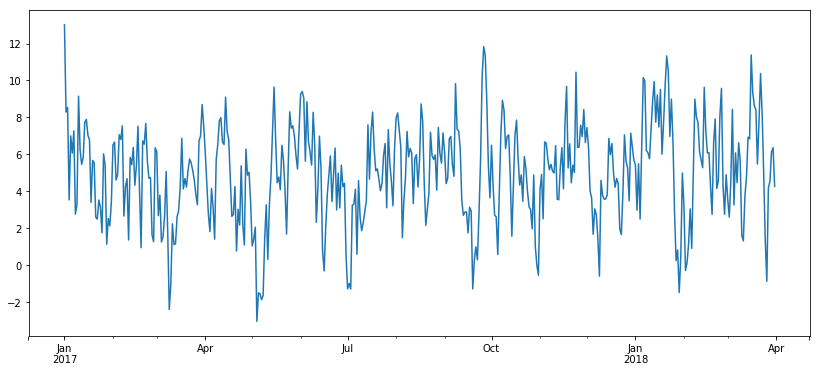

In [19]:
# keep the random seed
np.random.seed(11225)


In [20]:
# store the parameters


In [31]:
# generate the time series according to the formula
date_index = pd.DatetimeIndex(start='2017/01/01', end='2018/03/31', freq='D')
wn = np.random.normal(0,2,len(date_index))
def generate_ar(date_index, wn, phi, y_zero, mu):
    y_array = []
    y_prev = y_zero
    wn_prev = 0
    for i in range(len(wn)):
        y = mu + phi*y_prev + wn[i]
        y_array.append(y)
        y_prev = y - mu
    y_array = np.array(y_array)
    ds = pd.Series(data=y_array, index=date_index)
    return ds

ds = generate_ar(date_index, wn, 0.7, 8, 5)
# create a series with the specified dates


Plot the time series and verify what you see

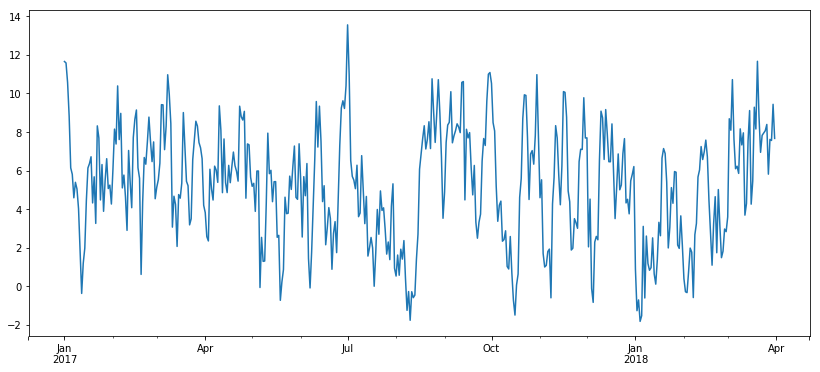

In [32]:
# plot here
ds.plot(figsize=(14,6));

## Look at the ACF and PACF of your model and write down your conclusions

We recommend to use `plot_acf` in statsmodels instead of the pandas ACF variant.

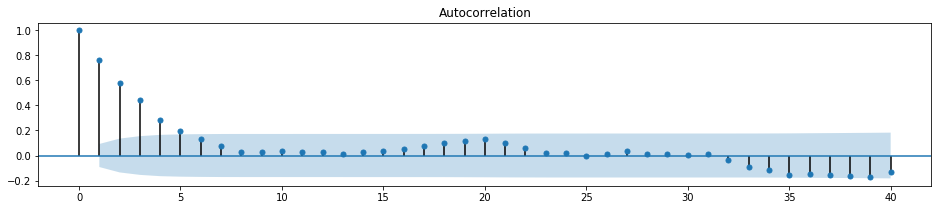

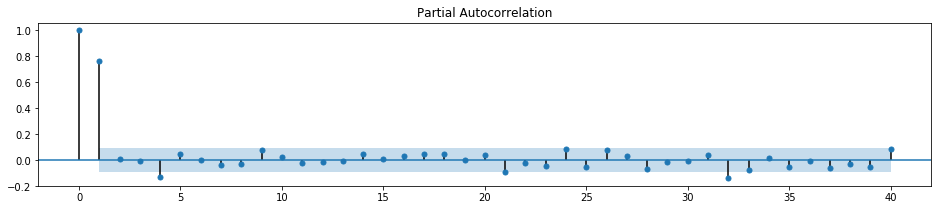

In [33]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(ds,ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(ds,ax=ax, lags=40);

## Check your model with ARMA in statsmodels

Statsmodels also has a tool that fits ARMA models on time series. The only thing you have to do is provide the number of orders for AR vs MA. Have a look at the code below, and the output of the code. Make sure that the output for the $\phi$ parameter and $\mu$ is as you'd expect!

In [34]:
# assuming your time series are stored in an object "series"
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(ds, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  455
Model:                     ARMA(1, 0)   Log Likelihood                -941.788
Method:                       css-mle   S.D. of innovations              1.915
Date:                Thu, 03 Oct 2019   AIC                           1889.576
Time:                        18:39:20   BIC                           1901.937
Sample:                    01-01-2017   HQIC                          1894.445
                         - 03-31-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2700      0.382     13.802      0.000       4.522       6.018
ar.L1.y        0.7664      0.030     25.273      0.000       0.707       0.826
                                    Roots           

C:\Users\ww\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\ww\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\ww\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[t

## Generate an MA model of the first order with $\theta = 0.9$

Recall that the MA model has the following formula:

$$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

This means that:

$$Y_1 = \mu + \epsilon_1+  \theta * \epsilon_{0}$$
$$Y_2 = \mu + \epsilon_2+  \theta * \epsilon_{1}$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 4. Make sure you have a daily datetime index is ranging from April 2015 until the end of August 2015. Assume that $\mu=7$.

In [44]:
# keep the random seed
np.random.seed(1234)

# create a series with the specified dates
dates = pd.date_range('2015-04-01', '2015-08-31')
len(dates)

error = np.random.normal(0,4,len(dates))
mu = 7
theta = 0.9

TS = [None] * len(dates)
error_prev = error[0]
for i, row in enumerate(dates):
    TS[i] = mu + theta * error_prev +error[i]
    error_prev = error[i]


# store the parameters


#generate the time series

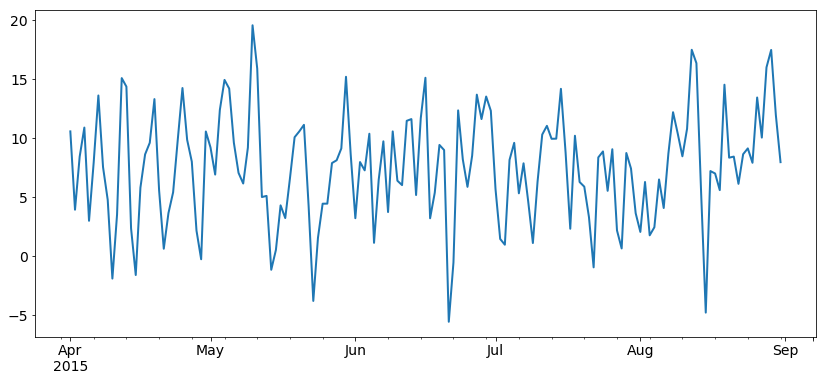

In [45]:
# Plot the time series
series =  pd.Series(TS, index=dates)

series.plot(figsize=(14,6), linewidth=2, fontsize=14);

## Look at the ACF and PACF of your model and write down your conclusions

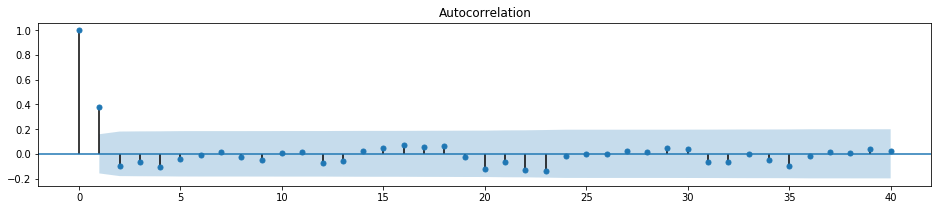

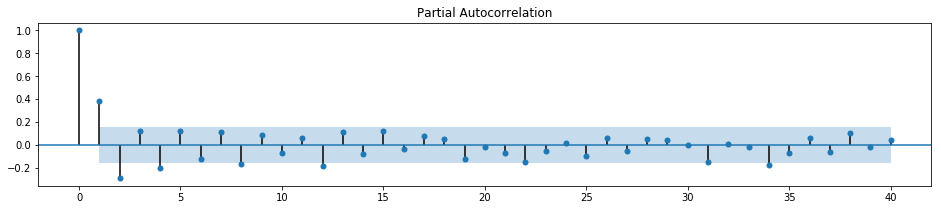

In [46]:
# plots here
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(series,ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(series,ax=ax, lags=40);

## Check your model with ARMA in statsmodels

Repeat what you did for your AR model but now for your MA model to verify the parameters are estimated correctly.

In [47]:
# Fit an AR(1) model to the first simulated data
mod_arma = ARMA(series, order=(0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  153
Model:                     ARMA(0, 1)   Log Likelihood                -426.378
Method:                       css-mle   S.D. of innovations              3.909
Date:                Thu, 03 Oct 2019   AIC                            858.757
Time:                        18:46:33   BIC                            867.848
Sample:                    04-01-2015   HQIC                           862.450
                         - 08-31-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5373      0.590     12.776      0.000       6.381       8.694
ma.L1.y        0.8727      0.051     17.165      0.000       0.773       0.972
                                    Roots           

## Create a model for the 400m data set

Import the data set containing the historical running times for the men's 400m on the Olympic games.

In [51]:
# the data is in "winning_400m.csv"
data = pd.read_csv("winning_400m.csv")
#data.year = data.year.astype(str)
data.year = pd.to_datetime(data.year.astype(str))

col_name= 'year'
data.set_index(col_name, inplace=True)

Plot the data

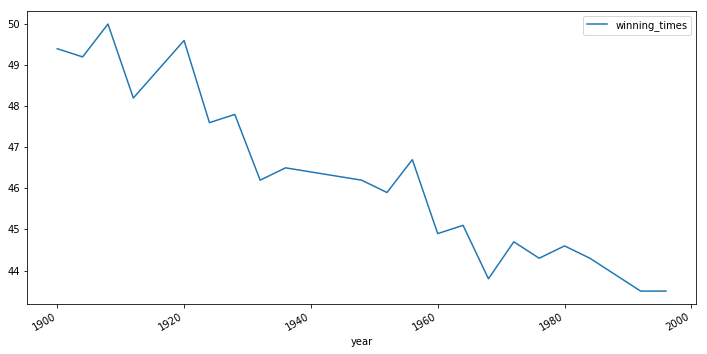

In [53]:
# your code here
data.plot(figsize=(12,6));

Difference the data to get a stationary time series. Make sure to remove the first NaN value.

In [55]:
# your code here
data_diff = data.diff(1).dropna()
data_diff.head()

,winning_times
year,
1904-01-01,-0.2
1908-01-01,0.8
1912-01-01,-1.8
1920-01-01,1.4
1924-01-01,-2.0


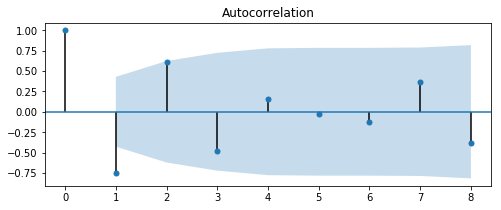

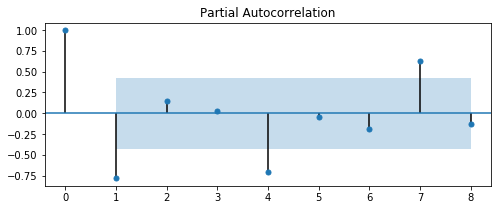

In [60]:
# Look at ACF and PACF
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(data_diff,ax=ax, lags=8);

fig, ax = plt.subplots(figsize=(8,3))
plot_pacf(data_diff,ax=ax, lags=8);

Based on the ACF and PACF, fit an arma model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates.

In [61]:
# your code here
mod_arma = ARMA(data_diff, order=(2,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 1)   Log Likelihood                 -18.955
Method:                       css-mle   S.D. of innovations              0.562
Date:                Thu, 03 Oct 2019   AIC                             47.911
Time:                        18:52:04   BIC                             53.133
Sample:                             0   HQIC                            49.044
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2916      0.073     -4.018      0.001      -0.434      -0.149
ar.L1.winning_times    -1.6827      0.119    -14.199      0.000      -1.915      -1.450
ar.L2.winning_ti

C:\Users\ww\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [62]:
# Try another one
mod_arma = ARMA(data_diff, order=(2,2))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 2)   Log Likelihood                 -16.472
Method:                       css-mle   S.D. of innovations              0.461
Date:                Thu, 03 Oct 2019   AIC                             44.943
Time:                        18:52:23   BIC                             51.210
Sample:                             0   HQIC                            46.303
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2718      0.098     -2.779      0.013      -0.463      -0.080
ar.L1.winning_times    -1.7575      0.097    -18.069      0.000      -1.948      -1.567
ar.L2.winning_ti

C:\Users\ww\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


## What is your final model? Why did you pick this model?

In [ ]:
# Your comments here

## Summary

Great! Now that you know the ins and outs of ARMA models and you've practiced your modeling knowledge.